In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
fLL = '/Users/yuntse/data/slarchetto/monitoring/LArLevel_20231002.csv'

In [3]:
LL = pd.read_csv(fLL, header = None, skiprows = 1, names = ['Time', 'Liquid_Level'])

In [4]:
LL['Time'] = LL['Time'].transform(lambda t: datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f'))

In [5]:
LL_trim = LL[(LL.Liquid_Level<1.)&(LL.Liquid_Level>0.)]

In [6]:
LL_trim[(LL_trim.Liquid_Level>0.71)&(LL_trim.Liquid_Level<0.713)]

,Time,Liquid_Level
368,2023-10-02 11:51:27.540,0.712932
396,2023-10-02 11:56:07.550,0.710343
440,2023-10-02 12:06:07.573,0.710142
507,2023-10-02 12:17:37.599,0.710425
514,2023-10-02 12:18:47.602,0.710033
516,2023-10-02 12:19:07.602,0.710924
518,2023-10-02 12:19:27.603,0.711801
520,2023-10-02 12:19:47.604,0.711581
523,2023-10-02 12:20:17.605,0.712552
533,2023-10-02 12:21:57.609,0.710907


In [7]:
LL_trim[LL_trim.Time=='2023-10-02 12:20:17.605']

,Time,Liquid_Level
523,2023-10-02 12:20:17.605,0.712552


In [8]:
LL_trim[(LL_trim.Time>'2023-10-02 11:49:17.605')&(LL_trim.Time<'2023-10-02 12:10:17.605')]

,Time,Liquid_Level
356,2023-10-02 11:49:27.536,0.698006
357,2023-10-02 11:49:37.536,0.697425
358,2023-10-02 11:49:47.537,0.693959
359,2023-10-02 11:49:57.537,0.699536
360,2023-10-02 11:50:07.537,0.696913
...,...,...
460,2023-10-02 12:09:37.581,0.703175
461,2023-10-02 12:09:47.582,0.704679
462,2023-10-02 12:09:57.582,0.693252
463,2023-10-02 12:10:07.582,0.699615


In [9]:
tRTD3 = datetime.strptime('2023-10-02 12:20:17.605', '%Y-%m-%d %H:%M:%S.%f')
tRTD3

datetime.datetime(2023, 10, 2, 12, 20, 17, 605000)

In [10]:
stopFirst = datetime.strptime('2023-10-02 11:49:57.537', '%Y-%m-%d %H:%M:%S.%f')
startSecond = datetime.strptime('2023-10-02 12:10:07.582', '%Y-%m-%d %H:%M:%S.%f')

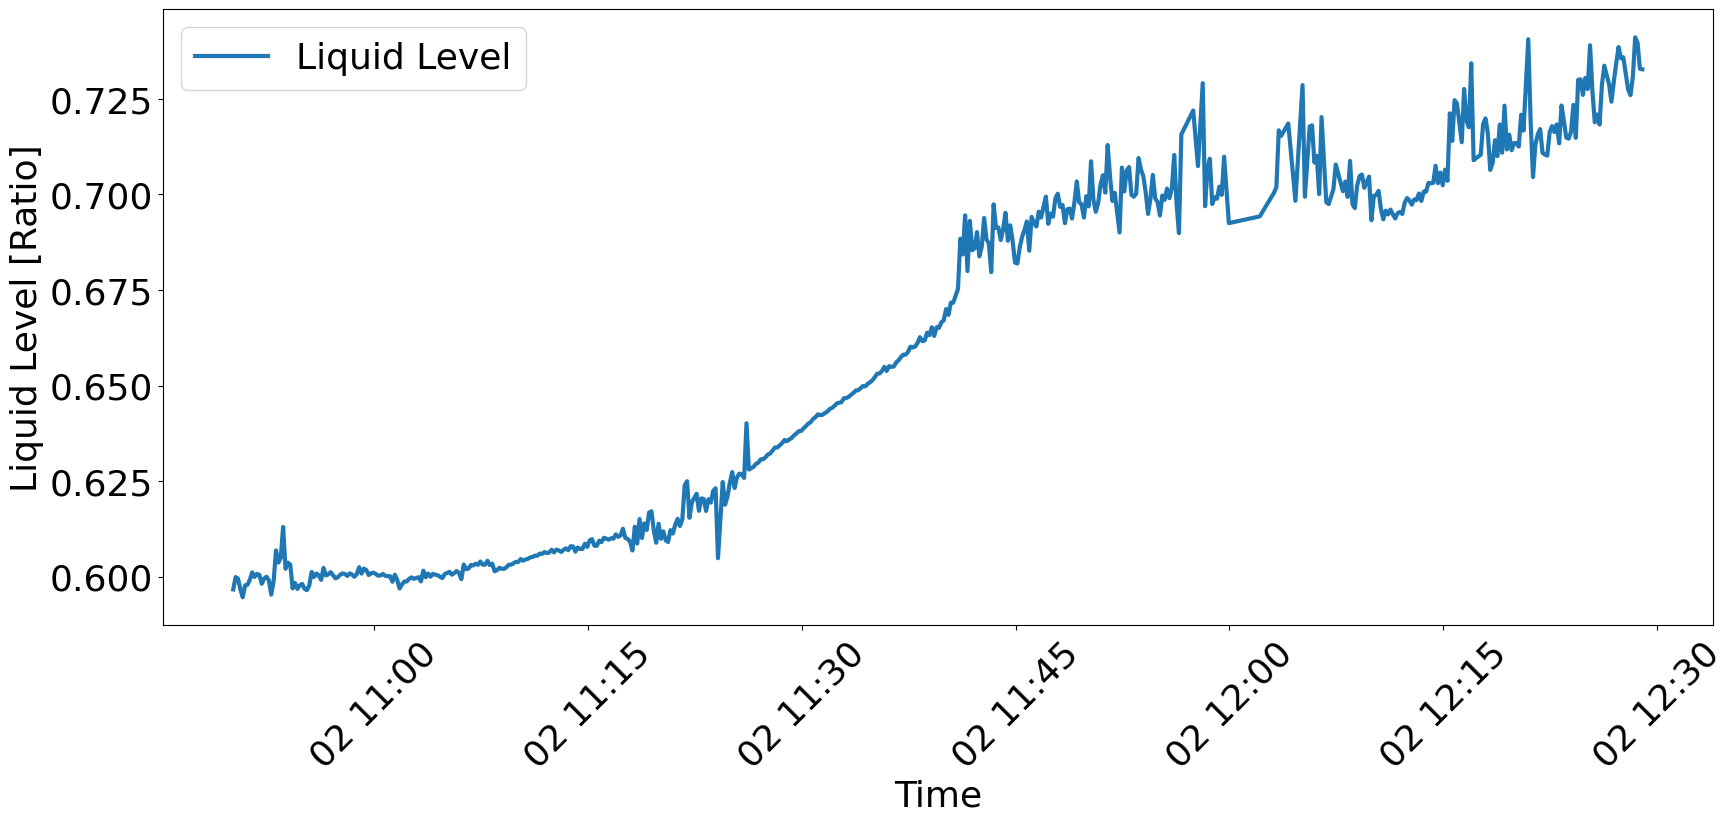

In [11]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))
ax.plot( LL_trim['Time'], LL_trim['Liquid_Level'], label = 'Liquid Level', lw = 3)
# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Liquid Level [Ratio]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)
ax.legend(loc = 'upper left', ncol = 1, fontsize = 26)

In [12]:
# Change the dataframe to series
LLSeries = LL_trim['Liquid_Level'].squeeze()
print( LLSeries )
print( type(LLSeries) )

0      0.596636
1      0.599865
2      0.599485
3      0.596669
4      0.594572
         ...   
571    0.730717
572    0.741134
573    0.739697
574    0.732879
575    0.732764
Name: Liquid_Level, Length: 552, dtype: float64
<class 'pandas.core.series.Series'>


In [13]:
# Number of samples to take the average
windowSize = 10

# Get the window of series
# of observations of specified window size
LLWindow = LLSeries.rolling( windowSize )
  
# Create a series of moving
# averages of each window
LLAveS = LLWindow.mean()
# std of each window
LLStdS = LLWindow.std()

In [14]:
# Convert the series to data frame
LLAve = LLAveS.to_frame()
LLStd = LLStdS.to_frame()
# Insert the time stamp and the std to the current average data frame
LLAve.insert( 1, 'Time', LL_trim['Time'] )
LLAve.insert( 2, 'Std', LLStd )
# Add a column of std/average in %
LLAve = LLAve.assign( Variation = lambda x: x.Std/-x.Liquid_Level*100. )
# Remove the NaN rows
LLAve = LLAve.dropna()
print( LLAve )

     Liquid_Level                    Time       Std  Variation
9        0.598297 2023-10-02 10:51:37.407  0.001971  -0.329454
10       0.598704 2023-10-02 10:51:47.407  0.002010  -0.335784
11       0.598762 2023-10-02 10:51:57.408  0.002055  -0.343202
12       0.598625 2023-10-02 10:52:07.408  0.002047  -0.341943
13       0.598906 2023-10-02 10:52:17.408  0.001939  -0.323692
..            ...                     ...       ...        ...
571      0.731137 2023-10-02 12:28:17.623  0.004744  -0.648840
572      0.732364 2023-10-02 12:28:27.624  0.005600  -0.764713
573      0.733906 2023-10-02 12:28:37.624  0.005238  -0.713702
574      0.734237 2023-10-02 12:28:47.624  0.005033  -0.685538
575      0.734087 2023-10-02 12:28:57.625  0.005055  -0.688596

[543 rows x 4 columns]


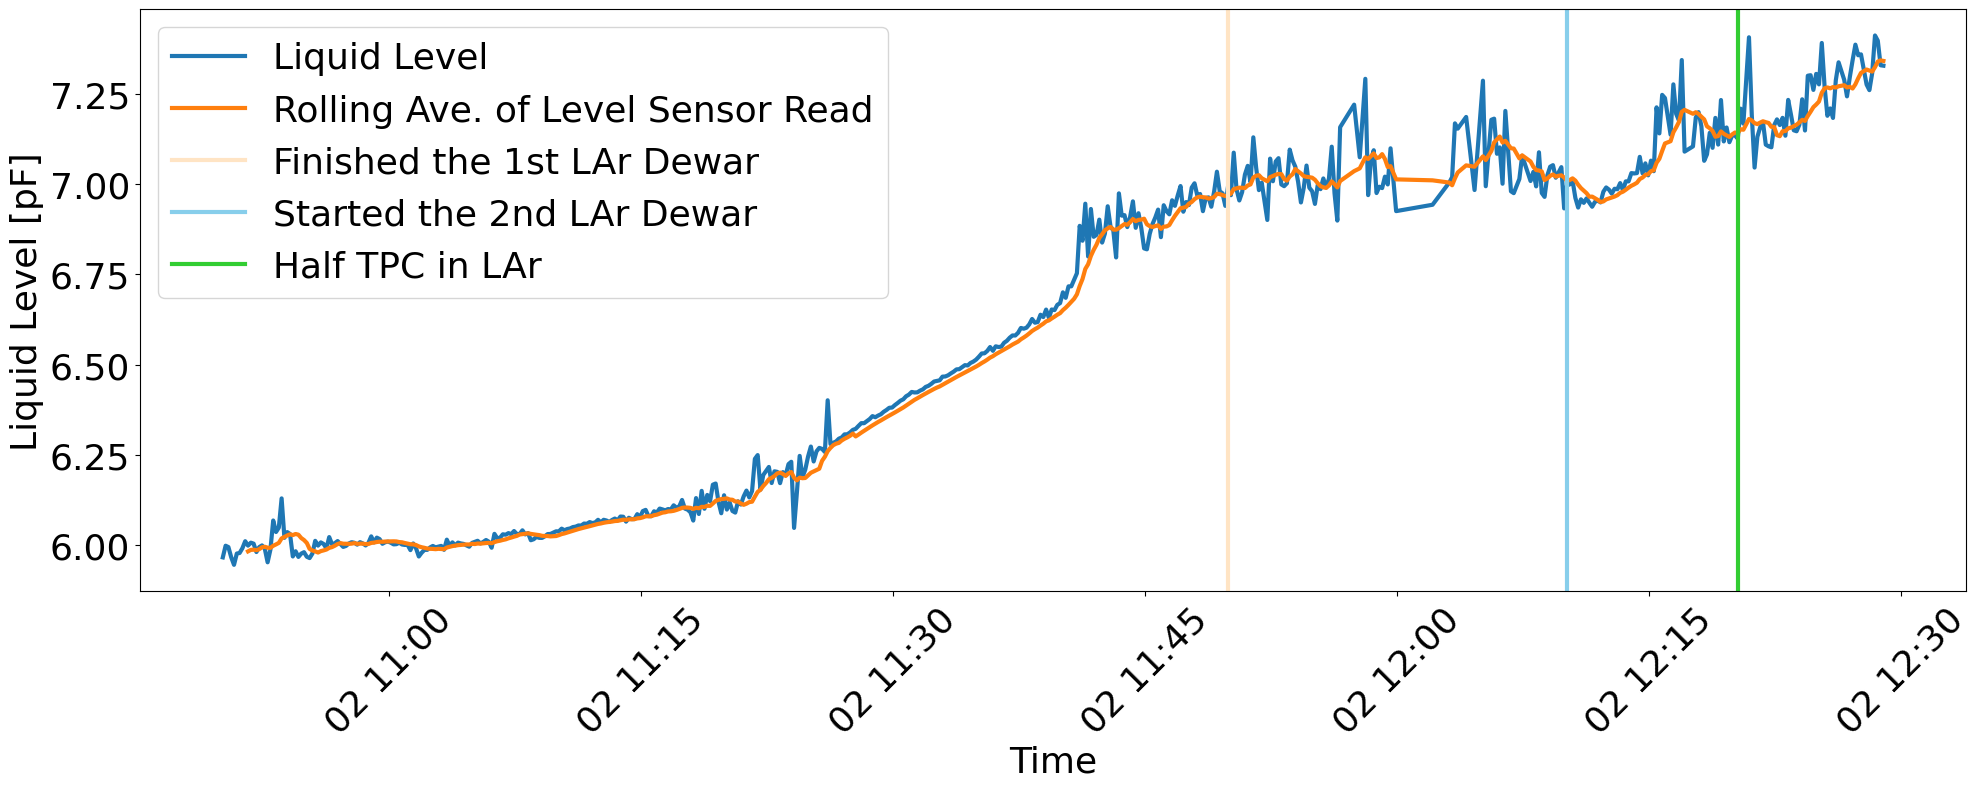

In [22]:
# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize = (20,8))
ax.plot( LL_trim['Time'], LL_trim['Liquid_Level']*10, label = 'Liquid Level', lw = 3)
ax.plot( LLAve['Time'], LLAve['Liquid_Level']*10, label = 'Rolling Ave. of Level Sensor Read', lw = 3)
plt.axvline( x = stopFirst, lw = 3, color = 'bisque', label = 'Finished the 1st LAr Dewar')
plt.axvline( x = startSecond, lw = 3, color = 'skyblue', label = 'Started the 2nd LAr Dewar')
plt.axvline( x = tRTD3, lw = 3, color = 'limegreen', label = 'Half TPC in LAr')

# set x-axis label
ax.set_xlabel('Time', fontsize = 26)
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 26)
# set y-axis label
ax.set_ylabel('Liquid Level [pF]', fontsize = 26)
ax.tick_params(axis = 'y', labelsize = 26)
ax.legend(loc = 'upper left', ncol = 1, fontsize = 26)
plt.tight_layout()
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevel_20231002.pdf')
fig.savefig('/Users/yuntse/Documents/DUNE/SLArchetto/Monitoring/LiquidLevel_20231002.png')